In [3]:
from konlpy.tag import Okt
okt = Okt()

def build_bag_of_words(document):
    document = document.replace(".","")
    tokenized_document = okt.morphs(document)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_document:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)
            bow.insert(len(word_to_index) - 1,1)
        else:
            index = word_to_index.get(word)
            bow[index] = bow[index] + 1
    return word_to_index,bow

In [4]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab,bow = build_bag_of_words(doc1)
print('vocabulary :',vocab)
print("bag of words vector:", bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [5]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :',vocab)
print('bag of words vector :',bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [6]:
doc3 = doc1 + ' ' + doc2
vocab,bow = build_bag_of_words(doc3)
print('vocabulary :',vocab)
print('bag of words vector :',bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print('bag of words vector :',vector.fit_transform(corpus).toarray())
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [10]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [11]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [12]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


In [13]:
import pandas as pd
from math import log
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [14]:
N = len(docs)

def tf(t,d):
    return d.count(t)
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))
def tfidf(t,d):
    return tf(t,d)*idf(t)

In [19]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t,d))
tf_ = pd.DataFrame(result,columns= vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [20]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
idf_ = pd.DataFrame(result,index=vocab,columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [21]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t,d))
tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do',
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do',
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A,B):
    return dot(A,B)/(norm(A)*norm(B))
doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서 2의 유사도 :',cos_sim(doc1,doc2))
print('문서 1과 문서 3의 유사도 :',cos_sim(doc1,doc3))
print('문서 2과 문서 3의 유사도 :',cos_sim(doc2,doc3))

문서 1과 문서 2의 유사도 : 0.6666666666666667
문서 1과 문서 3의 유사도 : 0.6666666666666667
문서 2과 문서 3의 유사도 : 1.0000000000000002


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('archive/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [6]:
data = data.head(20000)

In [7]:
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [8]:
data['overview'] = data['overview'].fillna('')

In [9]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


In [10]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [11]:
title_to_index = dict(zip(data['title'],data.index))

idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [12]:
def get_recommendations(title,cosine_sim=cosine_sim):
    idx = title_to_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [idx[0] for idx in sim_scores]
    return data['title'].iloc[movie_indices]

In [13]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

In [15]:
### 유클리드 거리 
import numpy as np
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))
print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


In [16]:
# 자카드 유사도
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [18]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'love', 'passport', 'card', 'holder', 'apple', 'you', 'everyone', 'coupon', 'like', 'watch', 'likey', 'banana'}


In [19]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'apple', 'banana'}


In [20]:
print('자카도 유사도 :',len(intersection)/len(union))

자카도 유사도 : 0.16666666666666666


In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)
def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [4]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [6]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [8]:
@tf.function
def hypothesis(x):
    return w*x+ b

In [12]:
x_text = [3.5,5,5.5,6]
print(hypothesis(x_text).numpy())

[15. 21. 23. 25.]


In [13]:
@tf.function
def mse_loss(y_pred,y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [14]:
x = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87,95]

In [15]:
optimizer = tf.optimizers.SGD(0.01)

In [16]:
for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(x)
        cost = mse_loss(y_pred,y)
    gradients = tape.gradient(cost,[w,b])
    optimizer.apply_gradients(zip(gradients,[w,b]))
    
    if i % 10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [17]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [18]:
model = Sequential()
model.add(keras.layers.Dense(1,input_dim=1))

NameError: name 'Sequential' is not defined

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

model.add(Dense(1,input_dim=1,activation='linear'))

sgd = optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd,loss='mse',metrics=['mse'])

model.fit(x,y,epochs=300)

C:\Users\sunho\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/300
1/1 [==============================] - 0s 304ms/step - loss: 3773.7058 - mse: 3773.7058
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 465.3995 - mse: 465.3995
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 58.3360 - mse: 58.3360
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 8.2487 - mse: 8.2487
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 2.0846 - mse: 2.0846
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.3251 - mse: 1.3251
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2305 - mse: 1.2305
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2177 - mse: 1.2177
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2150 - mse: 1.2150
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 1.2136 - mse: 1.2136
Epoch 11/300
1/1 [==============================] - 0s 4ms/step -

1/1 [==============================] - 0s 4ms/step - loss: 1.0994 - mse: 1.0994
Epoch 176/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0991 - mse: 1.0991
Epoch 177/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0987 - mse: 1.0987
Epoch 178/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0984 - mse: 1.0984
Epoch 179/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0981 - mse: 1.0981
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0978 - mse: 1.0978
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0975 - mse: 1.0975
Epoch 182/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0972 - mse: 1.0972
Epoch 183/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0969 - mse: 1.0969
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0966 - mse: 1.0966
Epoch 185/300
1/1 [==============================] - 0s 4ms/step - loss: 1

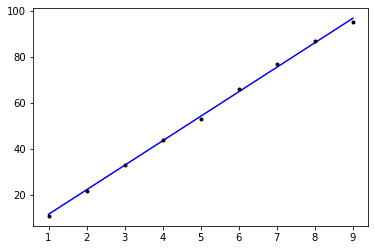

In [20]:
plt.plot(x,model.predict(x),'b',x,y,'k.')

In [21]:
print(model.predict([9.5]))

[[102.16576]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt

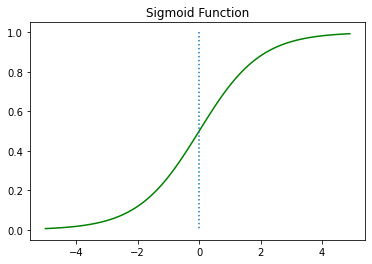

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0], ":")
plt.title('Sigmoid Function')
plt.show()

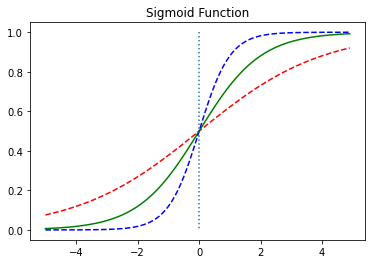

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'r',linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle='--')
plt.plot([0,0],[1.0,0.0], ":")
plt.title('Sigmoid Function')
plt.show()

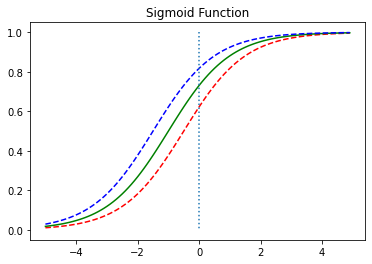

In [27]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x,y1,'r',linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle='--')
plt.plot([0,0],[1.0,0.0], ":")
plt.title('Sigmoid Function')
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1,input_dim=1,activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(x,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 290ms/step - loss: 38.2585 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 32.7541 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 27.2500 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 21.7470 - binary_accuracy: 0.1538
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 16.2477 - binary_accuracy: 0.1538
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 10.7607 - binary_accuracy: 0.1538
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 5.3218 - binary_accuracy: 0.1538
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.5988 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2370 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 2ms/step - loss: 0.1906 - binary_accuracy: 0.9231
Epoch 80/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1905 - binary_accuracy: 0.9231
Epoch 81/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1904 - binary_accuracy: 0.9231
Epoch 82/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1903 - binary_accuracy: 0.9231
Epoch 83/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1901 - binary_accuracy: 0.9231
Epoch 84/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1900 - binary_accuracy: 0.9231
Epoch 85/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1899 - binary_accuracy: 0.9231
Epoch 86/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1898 - binary_accuracy: 0.9231
Epoch 87/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1896 - binary_accuracy: 0.9231
Epoch 88/200
1/1 [==============================] - 0s 2ms/step - lo

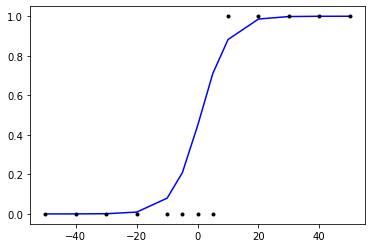

In [31]:
plt.plot(x,model.predict(x),'b',x,y,'k.')

In [32]:
print(model.predict([1,2,3,4,4.5]))
print(model.predict([11,21,31,41,500]))

[[0.50159466]
 [0.5570805 ]
 [0.6111776 ]
 [0.66266847]
 [0.687118  ]]
[[0.9034196 ]
 [0.98862886]
 [0.9987641 ]
 [0.99986684]
 [1.        ]]


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [3]:
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]])
y = np.array([73,82,72,57,34])

model = Sequential()
model.add(Dense(1,input_dim=3,activation='linear'))
sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])
model.fit(X,y,epochs=2000)

C:\Users\sunho\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/2000
1/1 [==============================] - 0s 287ms/step - loss: 16968.2793 - mse: 16968.2793
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 9006.3262 - mse: 9006.3262
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 4798.6665 - mse: 4798.6665
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 2573.5874 - mse: 2573.5874
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 1395.9333 - mse: 1395.9333
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 771.9507 - mse: 771.9507
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 440.8416 - mse: 440.8416
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 264.7869 - mse: 264.7869
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 170.9109 - mse: 170.9109
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 120.6486 - mse: 120.6486
Epoch 11/2000
1

1/1 [==============================] - 0s 2ms/step - loss: 37.6456 - mse: 37.6456
Epoch 87/2000
1/1 [==============================] - 0s 2ms/step - loss: 37.3941 - mse: 37.3941
Epoch 88/2000
1/1 [==============================] - 0s 2ms/step - loss: 37.1442 - mse: 37.1442
Epoch 89/2000
1/1 [==============================] - 0s 1ms/step - loss: 36.8961 - mse: 36.8961
Epoch 90/2000
1/1 [==============================] - 0s 1ms/step - loss: 36.6496 - mse: 36.6496
Epoch 91/2000
1/1 [==============================] - 0s 2ms/step - loss: 36.4047 - mse: 36.4047
Epoch 92/2000
1/1 [==============================] - 0s 2ms/step - loss: 36.1615 - mse: 36.1615
Epoch 93/2000
1/1 [==============================] - 0s 2ms/step - loss: 35.9199 - mse: 35.9199
Epoch 94/2000
1/1 [==============================] - 0s 2ms/step - loss: 35.6799 - mse: 35.6799
Epoch 95/2000
1/1 [==============================] - 0s 2ms/step - loss: 35.4415 - mse: 35.4415
Epoch 96/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 21.4382 - mse: 21.4382
Epoch 171/2000
1/1 [==============================] - 0s 1ms/step - loss: 21.2950 - mse: 21.2950
Epoch 172/2000
1/1 [==============================] - 0s 2ms/step - loss: 21.1527 - mse: 21.1527
Epoch 173/2000
1/1 [==============================] - 0s 2ms/step - loss: 21.0115 - mse: 21.0115
Epoch 174/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.8711 - mse: 20.8711
Epoch 175/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.7317 - mse: 20.7317
Epoch 176/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.5932 - mse: 20.5932
Epoch 177/2000
1/1 [==============================] - 0s 2ms/step - loss: 20.4557 - mse: 20.4557
Epoch 178/2000
1/1 [==============================] - 0s 5ms/step - loss: 20.3190 - mse: 20.3190
Epoch 179/2000
1/1 [==============================] - 0s 3ms/step - loss: 20.1833 - mse: 20.1833
Epoch 180/2000
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 12.2107 - mse: 12.2107
Epoch 255/2000
1/1 [==============================] - 0s 2ms/step - loss: 12.1291 - mse: 12.1291
Epoch 256/2000
1/1 [==============================] - 0s 2ms/step - loss: 12.0482 - mse: 12.0482
Epoch 257/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.9677 - mse: 11.9677
Epoch 258/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.8878 - mse: 11.8878
Epoch 259/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.8084 - mse: 11.8084
Epoch 260/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.7296 - mse: 11.7296
Epoch 261/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.6513 - mse: 11.6513
Epoch 262/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.5735 - mse: 11.5735
Epoch 263/2000
1/1 [==============================] - 0s 3ms/step - loss: 11.4962 - mse: 11.4962
Epoch 264/2000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 6.9107 - mse: 6.9107
Epoch 340/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.8646 - mse: 6.8646
Epoch 341/2000
1/1 [==============================] - 0s 1ms/step - loss: 6.8188 - mse: 6.8188
Epoch 342/2000
1/1 [==============================] - 0s 1000us/step - loss: 6.7733 - mse: 6.7733
Epoch 343/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.7281 - mse: 6.7281
Epoch 344/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.6832 - mse: 6.6832
Epoch 345/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.6386 - mse: 6.6386
Epoch 346/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.5943 - mse: 6.5943
Epoch 347/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.5503 - mse: 6.5503
Epoch 348/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.5066 - mse: 6.5066
Epoch 349/2000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 2ms/step - loss: 3.8873 - mse: 3.8873
Epoch 426/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.8614 - mse: 3.8614
Epoch 427/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.8356 - mse: 3.8356
Epoch 428/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.8101 - mse: 3.8101
Epoch 429/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.7847 - mse: 3.7847
Epoch 430/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.7595 - mse: 3.7595
Epoch 431/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.7344 - mse: 3.7344
Epoch 432/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.7096 - mse: 3.7096
Epoch 433/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.6848 - mse: 3.6848
Epoch 434/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.6603 - mse: 3.6603
Epoch 435/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 2.1889 - mse: 2.1889
Epoch 512/2000
1/1 [==============================] - 0s 999us/step - loss: 2.1743 - mse: 2.1743
Epoch 513/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.1599 - mse: 2.1599
Epoch 514/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.1455 - mse: 2.1455
Epoch 515/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.1312 - mse: 2.1312
Epoch 516/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.1171 - mse: 2.1171
Epoch 517/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.1030 - mse: 2.1030
Epoch 518/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.0890 - mse: 2.0890
Epoch 519/2000
1/1 [==============================] - 0s 1ms/step - loss: 2.0752 - mse: 2.0752
Epoch 520/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.0614 - mse: 2.0614
Epoch 521/2000
1/1 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 2ms/step - loss: 1.2348 - mse: 1.2348
Epoch 598/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2266 - mse: 1.2266
Epoch 599/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2185 - mse: 1.2185
Epoch 600/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2104 - mse: 1.2104
Epoch 601/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.2024 - mse: 1.2024
Epoch 602/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1945 - mse: 1.1945
Epoch 603/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1866 - mse: 1.1866
Epoch 604/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1787 - mse: 1.1787
Epoch 605/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.1709 - mse: 1.1709
Epoch 606/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.1631 - mse: 1.1631
Epoch 607/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.6988 - mse: 0.6988
Epoch 684/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6942 - mse: 0.6942
Epoch 685/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6897 - mse: 0.6897
Epoch 686/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6851 - mse: 0.6851
Epoch 687/2000
1/1 [==============================] - 0s 999us/step - loss: 0.6806 - mse: 0.6806
Epoch 688/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6762 - mse: 0.6762
Epoch 689/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6717 - mse: 0.6717
Epoch 690/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6673 - mse: 0.6673
Epoch 691/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6629 - mse: 0.6629
Epoch 692/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6586 - mse: 0.6586
Epoch 693/2000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 3ms/step - loss: 0.3977 - mse: 0.3977
Epoch 770/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3951 - mse: 0.3951
Epoch 771/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3926 - mse: 0.3926
Epoch 772/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3900 - mse: 0.3900
Epoch 773/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3875 - mse: 0.3875
Epoch 774/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3850 - mse: 0.3850
Epoch 775/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3825 - mse: 0.3825
Epoch 776/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3800 - mse: 0.3800
Epoch 777/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3776 - mse: 0.3776
Epoch 778/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3751 - mse: 0.3751
Epoch 779/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.2286 - mse: 0.2286
Epoch 856/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2271 - mse: 0.2271
Epoch 857/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2257 - mse: 0.2257
Epoch 858/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2243 - mse: 0.2243
Epoch 859/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2229 - mse: 0.2229
Epoch 860/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2214 - mse: 0.2214
Epoch 861/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2200 - mse: 0.2200
Epoch 862/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2186 - mse: 0.2186
Epoch 863/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2173 - mse: 0.2173
Epoch 864/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2159 - mse: 0.2159
Epoch 865/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.1336 - mse: 0.1336
Epoch 942/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1328 - mse: 0.1328
Epoch 943/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.1320
Epoch 944/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1312 - mse: 0.1312
Epoch 945/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1304 - mse: 0.1304
Epoch 946/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1296 - mse: 0.1296
Epoch 947/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1288 - mse: 0.1288
Epoch 948/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.1280
Epoch 949/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.1272
Epoch 950/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 0.1264
Epoch 951/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0802 - mse: 0.0802
Epoch 1028/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0797 - mse: 0.0797
Epoch 1029/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0793 - mse: 0.0793
Epoch 1030/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0788 - mse: 0.0788
Epoch 1031/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0784 - mse: 0.0784
Epoch 1032/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0779 - mse: 0.0779
Epoch 1033/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0775 - mse: 0.0775
Epoch 1034/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0771 - mse: 0.0771
Epoch 1035/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0766 - mse: 0.0766
Epoch 1036/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0762 - mse: 0.0762
Epoch 1037/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0505 - mse: 0.0505
Epoch 1113/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0502 - mse: 0.0502
Epoch 1114/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0500 - mse: 0.0500
Epoch 1115/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497 - mse: 0.0497
Epoch 1116/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0494 - mse: 0.0494
Epoch 1117/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0492 - mse: 0.0492
Epoch 1118/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489 - mse: 0.0489
Epoch 1119/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0487 - mse: 0.0487
Epoch 1120/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0484 - mse: 0.0484
Epoch 1121/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0482 - mse: 0.0482
Epoch 1122/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0337
Epoch 1198/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0335 - mse: 0.0335
Epoch 1199/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0334 - mse: 0.0334
Epoch 1200/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0332 - mse: 0.0332
Epoch 1201/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331
Epoch 1202/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0329 - mse: 0.0329
Epoch 1203/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0328 - mse: 0.0328
Epoch 1204/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0326 - mse: 0.0326
Epoch 1205/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0325 - mse: 0.0325
Epoch 1206/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0324 - mse: 0.0324
Epoch 1207/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0241 - mse: 0.0241
Epoch 1283/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0241 - mse: 0.0241
Epoch 1284/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0240 - mse: 0.0240
Epoch 1285/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0239 - mse: 0.0239
Epoch 1286/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238
Epoch 1287/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0237 - mse: 0.0237
Epoch 1288/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0237 - mse: 0.0237
Epoch 1289/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236
Epoch 1290/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235
Epoch 1291/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0234 - mse: 0.0234
Epoch 1292/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0188 - mse: 0.0188
Epoch 1368/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1369/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1370/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186
Epoch 1371/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186
Epoch 1372/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 1373/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 1374/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184 - mse: 0.0184
Epoch 1375/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0184 - mse: 0.0184
Epoch 1376/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183
Epoch 1377/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157
Epoch 1453/2000
1/1 [==============================] - 0s 1000us/step - loss: 0.0157 - mse: 0.0157
Epoch 1454/2000
1/1 [==============================] - 0s 999us/step - loss: 0.0157 - mse: 0.0157
Epoch 1455/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1456/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1457/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1458/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156 - mse: 0.0156
Epoch 1459/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1460/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1461/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155 - mse: 0.0155
Epoch 1462/2000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1538/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1539/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140
Epoch 1540/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1541/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1542/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1543/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1544/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1545/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1546/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0139 - mse: 0.0139
Epoch 1547/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1623/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1624/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1625/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1626/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1627/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1628/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1629/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129
Epoch 1630/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129
Epoch 1631/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129
Epoch 1632/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1708/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1709/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1710/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1711/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1712/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1713/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1714/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1715/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1716/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1717/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1793/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1794/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1795/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1796/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1797/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1798/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1799/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1800/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1801/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 1802/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1878/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1879/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1880/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1881/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1882/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1883/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1884/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1885/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1886/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119 - mse: 0.0119
Epoch 1887/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1963/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1964/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1965/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1966/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1967/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1968/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1969/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1970/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1971/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118 - mse: 0.0118
Epoch 1972/2000
1/1 [==============================] - 0

In [4]:
print(model.predict(X))

[[72.94827 ]
 [81.96974 ]
 [72.08479 ]
 [57.111305]
 [33.810562]]


In [5]:
X_test = np.array([[20,99,10],[40,50,20]])
print(model.predict(X_test))

[[57.939682]
 [56.04419 ]]


In [6]:
X = np.array([[0,0],[0,1],[1,0],[0,2],[1,1],[2,0]])
y = np.array([0,0,0,1,1,1])

model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['binary_accuracy'])

model.fit(X,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 290ms/step - loss: 0.7499 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7490 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7481 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7472 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7464 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7455 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7446 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7438 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.7429 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 2ms/step - loss: 0.6958 - binary_accuracy: 0.5000
Epoch 79/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6953 - binary_accuracy: 0.5000
Epoch 80/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6947 - binary_accuracy: 0.5000
Epoch 81/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6942 - binary_accuracy: 0.5000
Epoch 82/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6936 - binary_accuracy: 0.5000
Epoch 83/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 84/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6926 - binary_accuracy: 0.5000
Epoch 85/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6920 - binary_accuracy: 0.5000
Epoch 86/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6915 - binary_accuracy: 0.5000
Epoch 87/2000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6667
Epoch 155/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6607 - binary_accuracy: 0.6667
Epoch 156/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6667
Epoch 157/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6667
Epoch 158/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6596 - binary_accuracy: 0.6667
Epoch 159/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6592 - binary_accuracy: 0.6667
Epoch 160/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6667
Epoch 161/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6667
Epoch 162/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6667
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.6356 - binary_accuracy: 0.6667
Epoch 231/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6353 - binary_accuracy: 0.6667
Epoch 232/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6350 - binary_accuracy: 0.6667
Epoch 233/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6347 - binary_accuracy: 0.6667
Epoch 234/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6344 - binary_accuracy: 0.6667
Epoch 235/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6341 - binary_accuracy: 0.6667
Epoch 236/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6338 - binary_accuracy: 0.6667
Epoch 237/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6335 - binary_accuracy: 0.6667
Epoch 238/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_accuracy: 0.6667
Epoch 239/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.6148 - binary_accuracy: 0.6667
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6146 - binary_accuracy: 0.6667
Epoch 308/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6143 - binary_accuracy: 0.6667
Epoch 309/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6141 - binary_accuracy: 0.6667
Epoch 310/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6138 - binary_accuracy: 0.6667
Epoch 311/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6136 - binary_accuracy: 0.6667
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6133 - binary_accuracy: 0.6667
Epoch 313/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6131 - binary_accuracy: 0.6667
Epoch 314/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6128 - binary_accuracy: 0.6667
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5967 - binary_accuracy: 0.6667
Epoch 383/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5965 - binary_accuracy: 0.6667
Epoch 384/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5963 - binary_accuracy: 0.6667
Epoch 385/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5960 - binary_accuracy: 0.6667
Epoch 386/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5958 - binary_accuracy: 0.6667
Epoch 387/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5956 - binary_accuracy: 0.6667
Epoch 388/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5954 - binary_accuracy: 0.6667
Epoch 389/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5951 - binary_accuracy: 0.6667
Epoch 390/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5949 - binary_accuracy: 0.6667
Epoch 391/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.5803 - binary_accuracy: 0.6667
Epoch 459/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5801 - binary_accuracy: 0.6667
Epoch 460/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5799 - binary_accuracy: 0.6667
Epoch 461/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5797 - binary_accuracy: 0.6667
Epoch 462/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5795 - binary_accuracy: 0.6667
Epoch 463/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5793 - binary_accuracy: 0.6667
Epoch 464/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5791 - binary_accuracy: 0.6667
Epoch 465/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5789 - binary_accuracy: 0.6667
Epoch 466/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5786 - binary_accuracy: 0.6667
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5651 - binary_accuracy: 0.6667
Epoch 535/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5649 - binary_accuracy: 0.6667
Epoch 536/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5647 - binary_accuracy: 0.6667
Epoch 537/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - binary_accuracy: 0.6667
Epoch 538/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5643 - binary_accuracy: 0.6667
Epoch 539/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5641 - binary_accuracy: 0.6667
Epoch 540/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5639 - binary_accuracy: 0.6667
Epoch 541/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5637 - binary_accuracy: 0.6667
Epoch 542/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5635 - binary_accuracy: 0.6667
Epoch 543/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5508 - binary_accuracy: 0.6667
Epoch 611/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5506 - binary_accuracy: 0.6667
Epoch 612/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5504 - binary_accuracy: 0.6667
Epoch 613/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5503 - binary_accuracy: 0.6667
Epoch 614/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5501 - binary_accuracy: 0.6667
Epoch 615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5499 - binary_accuracy: 0.6667
Epoch 616/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5497 - binary_accuracy: 0.6667
Epoch 617/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5495 - binary_accuracy: 0.6667
Epoch 618/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5494 - binary_accuracy: 0.6667
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.5373 - binary_accuracy: 0.6667
Epoch 687/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5372 - binary_accuracy: 0.6667
Epoch 688/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5370 - binary_accuracy: 0.6667
Epoch 689/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5368 - binary_accuracy: 0.6667
Epoch 690/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5366 - binary_accuracy: 0.6667
Epoch 691/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5365 - binary_accuracy: 0.6667
Epoch 692/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5363 - binary_accuracy: 0.6667
Epoch 693/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5361 - binary_accuracy: 0.6667
Epoch 694/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5360 - binary_accuracy: 0.6667
Epoch 695/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5246 - binary_accuracy: 0.6667
Epoch 763/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5244 - binary_accuracy: 0.6667
Epoch 764/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5242 - binary_accuracy: 0.6667
Epoch 765/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5241 - binary_accuracy: 0.6667
Epoch 766/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5239 - binary_accuracy: 0.6667
Epoch 767/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5237 - binary_accuracy: 0.6667
Epoch 768/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5236 - binary_accuracy: 0.6667
Epoch 769/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5234 - binary_accuracy: 0.6667
Epoch 770/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5233 - binary_accuracy: 0.6667
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.5124 - binary_accuracy: 0.6667
Epoch 839/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5123 - binary_accuracy: 0.6667
Epoch 840/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5121 - binary_accuracy: 0.6667
Epoch 841/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5120 - binary_accuracy: 0.6667
Epoch 842/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5118 - binary_accuracy: 0.6667
Epoch 843/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.5116 - binary_accuracy: 0.6667
Epoch 844/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5115 - binary_accuracy: 0.6667
Epoch 845/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5113 - binary_accuracy: 0.6667
Epoch 846/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5112 - binary_accuracy: 0.6667
Epoch 847/2000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 0.5009 - binary_accuracy: 0.6667
Epoch 915/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5007 - binary_accuracy: 0.6667
Epoch 916/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5006 - binary_accuracy: 0.6667
Epoch 917/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5004 - binary_accuracy: 0.6667
Epoch 918/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5003 - binary_accuracy: 0.6667
Epoch 919/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5001 - binary_accuracy: 0.6667
Epoch 920/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5000 - binary_accuracy: 0.6667
Epoch 921/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4998 - binary_accuracy: 0.6667
Epoch 922/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4997 - binary_accuracy: 0.6667
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4899 - binary_accuracy: 0.6667
Epoch 991/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4897 - binary_accuracy: 0.6667
Epoch 992/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4896 - binary_accuracy: 0.6667
Epoch 993/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4894 - binary_accuracy: 0.6667
Epoch 994/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4893 - binary_accuracy: 0.6667
Epoch 995/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4892 - binary_accuracy: 0.6667
Epoch 996/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4890 - binary_accuracy: 0.6667
Epoch 997/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4889 - binary_accuracy: 0.6667
Epoch 998/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4887 - binary_accuracy: 0.6667
Epoch 999/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4794 - binary_accuracy: 0.6667
Epoch 1067/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4792 - binary_accuracy: 0.6667
Epoch 1068/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4791 - binary_accuracy: 0.6667
Epoch 1069/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4790 - binary_accuracy: 0.6667
Epoch 1070/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4788 - binary_accuracy: 0.6667
Epoch 1071/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4787 - binary_accuracy: 0.6667
Epoch 1072/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4786 - binary_accuracy: 0.6667
Epoch 1073/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4784 - binary_accuracy: 0.6667
Epoch 1074/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4783 - binary_accuracy: 0.6667
Epoch 1075/2000
1/1 [=======================

Epoch 1142/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4694 - binary_accuracy: 0.6667
Epoch 1143/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4692 - binary_accuracy: 0.6667
Epoch 1144/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4691 - binary_accuracy: 0.6667
Epoch 1145/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4690 - binary_accuracy: 0.6667
Epoch 1146/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4688 - binary_accuracy: 0.6667
Epoch 1147/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4687 - binary_accuracy: 0.6667
Epoch 1148/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4686 - binary_accuracy: 0.6667
Epoch 1149/2000
1/1 [==============================] - 0s 1000us/step - loss: 0.4685 - binary_accuracy: 0.6667
Epoch 1150/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4683 - binary_accuracy: 0.6667
Epoch 1151/2000
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 0.4599 - binary_accuracy: 0.6667
Epoch 1218/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4598 - binary_accuracy: 0.6667
Epoch 1219/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4597 - binary_accuracy: 0.6667
Epoch 1220/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4595 - binary_accuracy: 0.6667
Epoch 1221/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4594 - binary_accuracy: 0.6667
Epoch 1222/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4593 - binary_accuracy: 0.6667
Epoch 1223/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4592 - binary_accuracy: 0.6667
Epoch 1224/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4590 - binary_accuracy: 0.6667
Epoch 1225/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4589 - binary_accuracy: 0.6667
Epoch 1226/2000
1/1 [=======================

Epoch 1293/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4507 - binary_accuracy: 0.6667
Epoch 1294/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4506 - binary_accuracy: 0.6667
Epoch 1295/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4505 - binary_accuracy: 0.6667
Epoch 1296/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4504 - binary_accuracy: 0.6667
Epoch 1297/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4503 - binary_accuracy: 0.6667
Epoch 1298/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4502 - binary_accuracy: 0.6667
Epoch 1299/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4500 - binary_accuracy: 0.6667
Epoch 1300/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4499 - binary_accuracy: 0.6667
Epoch 1301/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4498 - binary_accuracy: 0.6667
Epoch 1302/2000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.4421 - binary_accuracy: 0.8333
Epoch 1369/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4420 - binary_accuracy: 0.8333
Epoch 1370/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4419 - binary_accuracy: 0.8333
Epoch 1371/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4418 - binary_accuracy: 0.8333
Epoch 1372/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4416 - binary_accuracy: 0.8333
Epoch 1373/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4415 - binary_accuracy: 0.8333
Epoch 1374/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4414 - binary_accuracy: 0.8333
Epoch 1375/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4413 - binary_accuracy: 0.8333
Epoch 1376/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4412 - binary_accuracy: 0.8333
Epoch 1377/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4337 - binary_accuracy: 1.0000
Epoch 1445/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4336 - binary_accuracy: 1.0000
Epoch 1446/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4335 - binary_accuracy: 1.0000
Epoch 1447/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4334 - binary_accuracy: 1.0000
Epoch 1448/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4333 - binary_accuracy: 1.0000
Epoch 1449/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4331 - binary_accuracy: 1.0000
Epoch 1450/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4330 - binary_accuracy: 1.0000
Epoch 1451/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4329 - binary_accuracy: 1.0000
Epoch 1452/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4328 - binary_accuracy: 1.0000
Epoch 1453/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4256 - binary_accuracy: 1.0000
Epoch 1521/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4255 - binary_accuracy: 1.0000
Epoch 1522/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4254 - binary_accuracy: 1.0000
Epoch 1523/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4253 - binary_accuracy: 1.0000
Epoch 1524/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4252 - binary_accuracy: 1.0000
Epoch 1525/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4251 - binary_accuracy: 1.0000
Epoch 1526/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4250 - binary_accuracy: 1.0000
Epoch 1527/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4249 - binary_accuracy: 1.0000
Epoch 1528/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4248 - binary_accuracy: 1.0000
Epoch 1529/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4180 - binary_accuracy: 1.0000
Epoch 1596/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4179 - binary_accuracy: 1.0000
Epoch 1597/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4178 - binary_accuracy: 1.0000
Epoch 1598/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4177 - binary_accuracy: 1.0000
Epoch 1599/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4176 - binary_accuracy: 1.0000
Epoch 1600/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4175 - binary_accuracy: 1.0000
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4174 - binary_accuracy: 1.0000
Epoch 1602/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4173 - binary_accuracy: 1.0000
Epoch 1603/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4172 - binary_accuracy: 1.0000
Epoch 1604/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4107 - binary_accuracy: 1.0000
Epoch 1671/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4106 - binary_accuracy: 1.0000
Epoch 1672/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4105 - binary_accuracy: 1.0000
Epoch 1673/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4104 - binary_accuracy: 1.0000
Epoch 1674/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4103 - binary_accuracy: 1.0000
Epoch 1675/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4102 - binary_accuracy: 1.0000
Epoch 1676/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4101 - binary_accuracy: 1.0000
Epoch 1677/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4100 - binary_accuracy: 1.0000
Epoch 1678/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4099 - binary_accuracy: 1.0000
Epoch 1679/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4036 - binary_accuracy: 1.0000
Epoch 1746/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4035 - binary_accuracy: 1.0000
Epoch 1747/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4034 - binary_accuracy: 1.0000
Epoch 1748/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4033 - binary_accuracy: 1.0000
Epoch 1749/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4033 - binary_accuracy: 1.0000
Epoch 1750/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4032 - binary_accuracy: 1.0000
Epoch 1751/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4031 - binary_accuracy: 1.0000
Epoch 1752/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.4030 - binary_accuracy: 1.0000
Epoch 1753/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4029 - binary_accuracy: 1.0000
Epoch 1754/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.3968 - binary_accuracy: 1.0000
Epoch 1822/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3967 - binary_accuracy: 1.0000
Epoch 1823/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3966 - binary_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3965 - binary_accuracy: 1.0000
Epoch 1825/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3964 - binary_accuracy: 1.0000
Epoch 1826/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3963 - binary_accuracy: 1.0000
Epoch 1827/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3962 - binary_accuracy: 1.0000
Epoch 1828/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3961 - binary_accuracy: 1.0000
Epoch 1829/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3960 - binary_accuracy: 1.0000
Epoch 1830/2000
1/1 [=======================

Epoch 1897/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3901 - binary_accuracy: 1.0000
Epoch 1898/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3901 - binary_accuracy: 1.0000
Epoch 1899/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3900 - binary_accuracy: 1.0000
Epoch 1900/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3899 - binary_accuracy: 1.0000
Epoch 1901/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3898 - binary_accuracy: 1.0000
Epoch 1902/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3897 - binary_accuracy: 1.0000
Epoch 1903/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3896 - binary_accuracy: 1.0000
Epoch 1904/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3895 - binary_accuracy: 1.0000
Epoch 1905/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3895 - binary_accuracy: 1.0000
Epoch 1906/2000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.3839 - binary_accuracy: 1.0000
Epoch 1973/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3838 - binary_accuracy: 1.0000
Epoch 1974/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3837 - binary_accuracy: 1.0000
Epoch 1975/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3836 - binary_accuracy: 1.0000
Epoch 1976/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3835 - binary_accuracy: 1.0000
Epoch 1977/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3834 - binary_accuracy: 1.0000
Epoch 1978/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3834 - binary_accuracy: 1.0000
Epoch 1979/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3833 - binary_accuracy: 1.0000
Epoch 1980/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3832 - binary_accuracy: 1.0000
Epoch 1981/2000
1/1 [=======================

In [8]:
print(model.predict(X))

[[0.19217917]
 [0.46443707]
 [0.46251667]
 [0.7596802 ]
 [0.7582675 ]
 [0.7568491 ]]


In [9]:
import numpy as np

In [10]:
d = np.array(5)
print('텐서의 차원:',d.ndim)
print('텐서의 크기(shape):',d.shape)

텐서의 차원: 0
텐서의 크기(shape): ()


In [11]:
d = np.array([1,2,3,4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


In [12]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


In [13]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


In [14]:
import numpy as np

In [15]:
A = np.array([8,4,5])
B = np.array([1,2,3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [16]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


In [17]:
A = np.array([1,2,3])
B = np.array([4,5,6])
print('두 벡터의 내적 :',np.dot(A,B))

두 벡터의 내적 : 32


In [18]:
A = np.array([[1,3],[2,4]])
B = np.array([[5,7],[6,8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A,B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")
data = pd.read_csv('Iris.csv',encoding='latin1')
print('샘플의 개수 :',len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [21]:
print("품종 종류:",data['Species'].unique(),sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


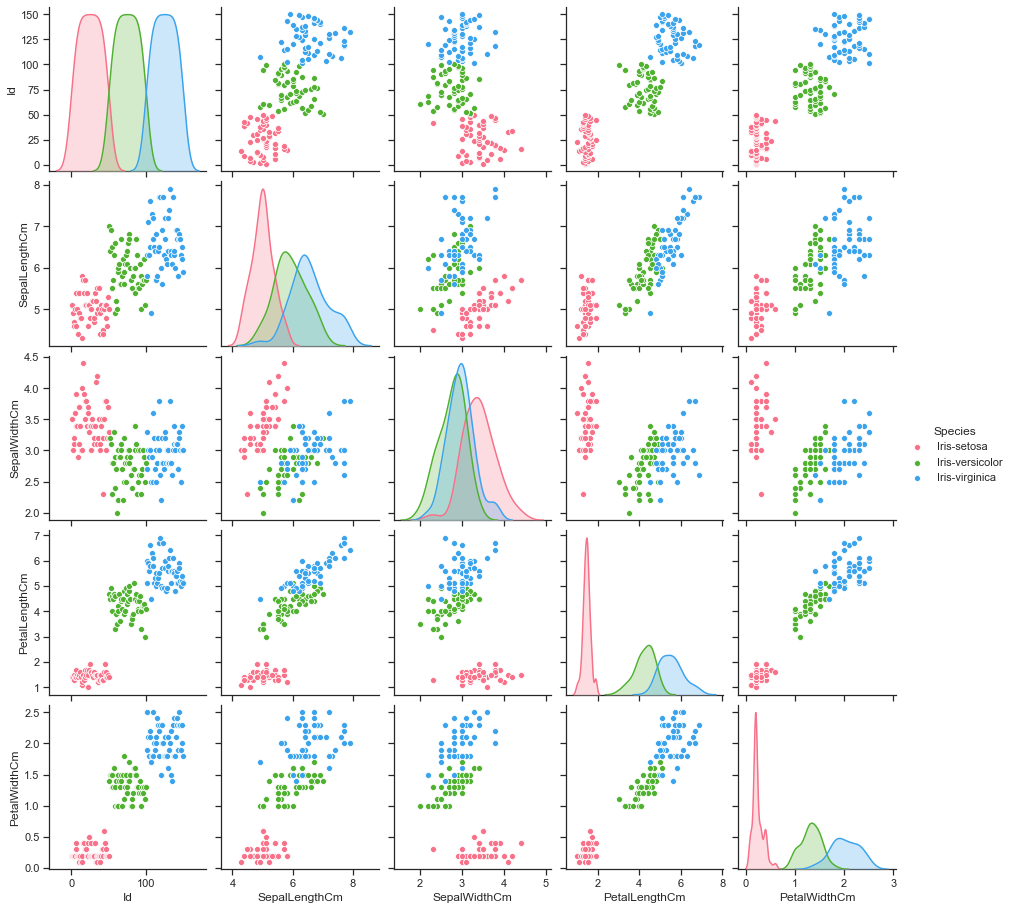

In [22]:
sns.set(style='ticks',color_codes=True)
g= sns.pairplot(data,hue='Species',palette='husl')

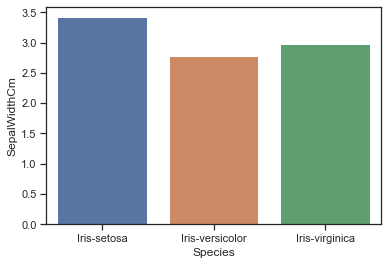

In [25]:
sns.barplot(data['Species'],data['SepalWidthCm'],ci=None)

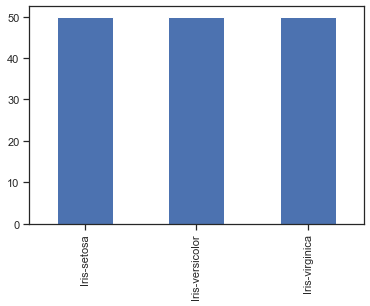

In [26]:
data['Species'].value_counts().plot(kind='bar')

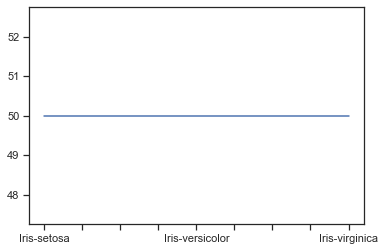

In [27]:
data['Species'].value_counts().plot()

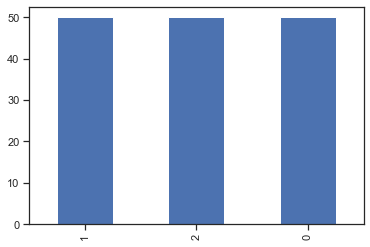

In [28]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [31]:
data_X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [32]:
(X_train,X_test,y_train,y_test) = train_test_split(data_X,data_y,train_size=0.8,random_state=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=200,batch_size=1,validation_data=(X_test,y_test))

Epoch 1/200
120/120 [==============================] - 1s 2ms/step - loss: 1.8984 - accuracy: 0.1333 - val_loss: 1.9795 - val_accuracy: 0.1000
Epoch 2/200
120/120 [==============================] - 0s 660us/step - loss: 1.5720 - accuracy: 0.2500 - val_loss: 1.7375 - val_accuracy: 0.2000
Epoch 3/200
120/120 [==============================] - 0s 635us/step - loss: 1.4104 - accuracy: 0.3583 - val_loss: 1.5732 - val_accuracy: 0.2000
Epoch 4/200
120/120 [==============================] - 0s 647us/step - loss: 1.3121 - accuracy: 0.3667 - val_loss: 1.4703 - val_accuracy: 0.2000
Epoch 5/200
120/120 [==============================] - 0s 651us/step - loss: 1.2435 - accuracy: 0.3667 - val_loss: 1.3860 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 702us/step - loss: 1.1820 - accuracy: 0.3667 - val_loss: 1.3123 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 777us/step - loss: 1.1249 - accuracy: 0.3667 - val_loss: 1.2321 - val_accu

120/120 [==============================] - 0s 643us/step - loss: 0.3854 - accuracy: 0.9333 - val_loss: 0.3839 - val_accuracy: 0.9667
Epoch 58/200
120/120 [==============================] - 0s 635us/step - loss: 0.3820 - accuracy: 0.9000 - val_loss: 0.3776 - val_accuracy: 0.9667
Epoch 59/200
120/120 [==============================] - 0s 660us/step - loss: 0.3806 - accuracy: 0.9333 - val_loss: 0.3714 - val_accuracy: 0.9667
Epoch 60/200
120/120 [==============================] - 0s 698us/step - loss: 0.3750 - accuracy: 0.9083 - val_loss: 0.3838 - val_accuracy: 0.9333
Epoch 61/200
120/120 [==============================] - 0s 639us/step - loss: 0.3707 - accuracy: 0.9250 - val_loss: 0.3655 - val_accuracy: 0.9667
Epoch 62/200
120/120 [==============================] - 0s 639us/step - loss: 0.3694 - accuracy: 0.9333 - val_loss: 0.3672 - val_accuracy: 0.9667
Epoch 63/200
120/120 [==============================] - 0s 714us/step - loss: 0.3645 - accuracy: 0.9333 - val_loss: 0.3566 - val_accuracy

120/120 [==============================] - 0s 647us/step - loss: 0.2526 - accuracy: 0.9583 - val_loss: 0.2514 - val_accuracy: 0.9667
Epoch 114/200
120/120 [==============================] - 0s 622us/step - loss: 0.2510 - accuracy: 0.9667 - val_loss: 0.2506 - val_accuracy: 0.9667
Epoch 115/200
120/120 [==============================] - 0s 643us/step - loss: 0.2496 - accuracy: 0.9583 - val_loss: 0.2654 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 643us/step - loss: 0.2483 - accuracy: 0.9583 - val_loss: 0.2567 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 635us/step - loss: 0.2459 - accuracy: 0.9667 - val_loss: 0.2559 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 643us/step - loss: 0.2440 - accuracy: 0.9583 - val_loss: 0.2516 - val_accuracy: 0.9667
Epoch 119/200
120/120 [==============================] - 0s 714us/step - loss: 0.2455 - accuracy: 0.9667 - val_loss: 0.2573 - val_ac

Epoch 169/200
120/120 [==============================] - 0s 740us/step - loss: 0.1875 - accuracy: 0.9583 - val_loss: 0.1995 - val_accuracy: 0.9667
Epoch 170/200
120/120 [==============================] - 0s 643us/step - loss: 0.1865 - accuracy: 0.9583 - val_loss: 0.1985 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 668us/step - loss: 0.1865 - accuracy: 0.9500 - val_loss: 0.2060 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 677us/step - loss: 0.1863 - accuracy: 0.9667 - val_loss: 0.1913 - val_accuracy: 1.0000
Epoch 173/200
120/120 [==============================] - 0s 685us/step - loss: 0.1839 - accuracy: 0.9500 - val_loss: 0.2006 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 664us/step - loss: 0.1863 - accuracy: 0.9667 - val_loss: 0.1903 - val_accuracy: 1.0000
Epoch 175/200
120/120 [==============================] - 0s 685us/step - loss: 0.1836 - accuracy: 0.9583 - val_loss: 0

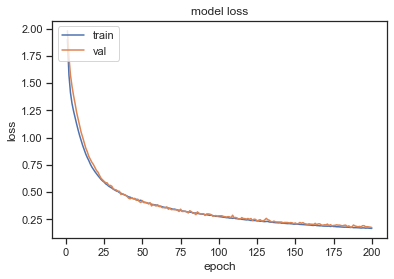

In [34]:
epochs = range(1,len(history.history['accuracy'])+1)
plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [35]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 126ms/step - loss: 0.1743 - accuracy: 1.0000

 테스트 정확도: 1.0000
